# Inaugural Project

Importing packages and activating autoreload

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from inauguralproject import householdClass

# Question 1

**Explanation of the code**

We start off by defining the different values for alpha and sigma in a list. Then we create empty lists, which are used to store the results when we solve the model, for these different values.

We construct a loop. This loop runs and solves the model, for all the different combinations of alpha and sigma. Then we calculate the ratio, HF/HM, and store these results in the list.

Finally, the results are plotted with matplotlib in a scatterplot.  Alternatively, one could have used a 3D plot to illustrate the results.

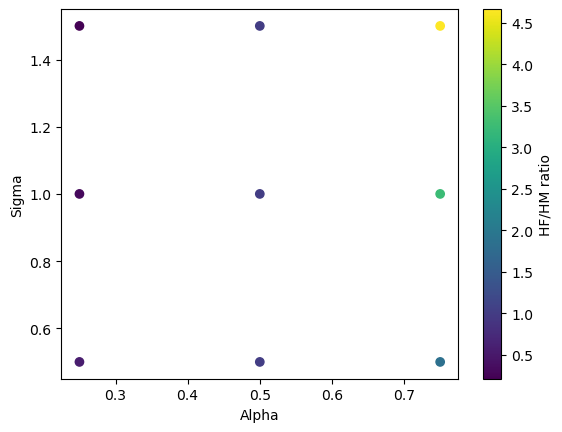

Alpha / Sigma    0.50    1.00    1.50
----------------------------------------
    0.25    |   0.55   0.31   0.21
    0.50    |   1.00   1.00   1.00
    0.75    |   1.83   3.25   4.67


In [2]:
import warnings
warnings.filterwarnings("ignore")

# Defining the different values of alpha and sigma
alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1, 1.5]

# Creating empty lists, to store results
ratios = []
alphas = []
sigmas = []

# Creating a loop for the different values of alpha and sigma
for alpha in alpha_vals:
    for sigma in sigma_vals:
        
        # Using the model to calculate optimal HF and HM
        household = householdClass()
        
        # Set the desired parameter values
        household.par.alpha = alpha
        household.par.sigma = sigma
        
        # Solving for the optimal values
        opt = household.solve_discrete()
        
        # Calculating the ratio, HF/HM
        ratio = opt.HF / opt.HM
        
        # Storing the results in the empty lists
        ratios.append(ratio)
        alphas.append(alpha)
        sigmas.append(sigma)
        
# Creating a scatterplot of the stored results in the list
plt.scatter(alphas, sigmas, c=ratios)
plt.colorbar(label='HF/HM ratio')
plt.xlabel('Alpha')
plt.ylabel('Sigma')
plt.show()

# Also creating a table
def print_table():
    #We define an empty text string to enter a title later
    text = ''

    # Creating the top header of the table. Alpha is values downward and Sigma to the right.
    text += f'{"Alpha - Sigma":3s}'
    for j, sigma in enumerate(sigma_vals):
       household.par.sigma = sigma
       text += f'{sigma:8.2f}' 
    text += '\n' + "-"*40 + "\n" # creating a line shift 
    
    # Creating the body of the table
    for i, alpha in enumerate(alpha_vals):
        household.par.alpha = alpha
        if i > 0:
            text += '\n' # creating a line shift
        text += f'{alpha:8.2f}    |' # creating the left header
        for j, sigma in enumerate(sigma_vals):
            household.par.sigma=sigma
            opt = household.solve_discrete()
            text += f'{opt.HF/opt.HM:7.2f}'
    
    # Print
    print(text)

print_table()

# Question 2

**Explanation of the code**

We import our householdClass as h. We then run an instance of the model, for all the different wages in the vector: [0.8,0.9,1.0,1.1,1.2].

The results are plotted using matplotlib. On the Y-axis, one is able to observe the log-ratio between HF and HM. On the X-axis, one is able to observe the log-ratio of wF and wM.

The color of the dot showcases the different values of wF.

In [ ]:
# Using the model to calculate optimal HF and HM
h = householdClass()

# Empty list to store results
ratios = []

# Looping over wF values
for wF in h.par.wF_vec:
    
    # Setting value 
    h.par.wageF = wF

    # Solving for discrete optimal choice
    opti = h.solve_discrete()

    # Creating Ratio 
    HF_HM = np.log(opti.HF/opti.HM)

    # Plotting 
    plt.plot(np.log(wF/h.par.wageM), HF_HM, 'o', label=f'wF = {wF/h.par.wageM:.2f}', linestyle="--")

    # Storing results
    ratios.append(HF_HM)

# Customizing plot 
plt.xlabel('log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.legend()

# Printing
print(ratios)
plt.show()

# Question 3

**Explanation of the code**

The approach is similar to Q2.

Before plotting the results, we have constructed a continous version of the model in our .py file.

Instead of using the solve_discrete() function as we did in Q2, we use solve_continous(). Results are plotted below.

In [ ]:
# Using the model to calculate optimal HF and HM
h = householdClass()

# Empty list
ContRatios = []

# Looping over wF values
for wF in h.par.wF_vec:
    
    # Setting value 
    h.par.wageF = wF

    # Solving for discrete optimal choice
    opti = h.solve_continuous()

    # Creating Ratio 
    HF_HM = np.log(opti.HF/opti.HM)

    # Plotting 
    plt.plot(np.log(wF/h.par.wageM), HF_HM, 'o', label=f'wF = {wF/h.par.wageM:.2f}')

    # Storing results
    ContRatios.append(HF_HM)

# Customizing plot 
plt.xlabel('log(wF/wM)')
plt.ylabel('Log(HF/HM)')
plt.legend()

# Printing
plt.show()

# Question 4

**Explanation of the code**

Text

In [ ]:
model = householdClass()
model.run_regression()